# Módulo 4 - Técnicas de Programação II

## Aula 3
- Gráficos com Matplotlib
- Exercícios

## Gráficos com Matplotlib
O matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays. Gráficos comuns podem ser criados com alta qualidade a partir de comandos simples, inspirados nos comandos gráficos do MATLAB.  
Devido a sua alta qualidade e simplicidade de uso é a biblioteca gráfica mais popular para análise de dados. 
  
**Documentação**: https://matplotlib.org/

### Instalação
Caso já tenha instalado o pacote do **Matplotlib** ou está na dúvida, basta rodar o seguinte código:

In [ ]:
import matplotlib

Se este código não rodou por erro ou se você não possui este pacote, para obtê-lo é simples, rode a célula abaixo

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import da biblioteca
  
Para utilizarmos o matplotlib importamos o submódulo **pyplot** conforme podem observar na célula abaixo.

In [ ]:
import matplotlib.pyplot as plt

O conjunto de funções disponível em **matplotlib.pyplot** permite a criação de uma figura, uma área para exibir o gráfico na figura, desenho de linhas na área do gráfico, decoração do gráfico com rótulos, etc. A sintaxe utilizada é semelhante ao MATLAB.  
   
Para simplificar o trabalho ainda mais, o pyplot já inicia com uma figura e área de desenho padrão, que você não precisa definir, e assim o código para gerar um gráfico pode ser simplesmente:

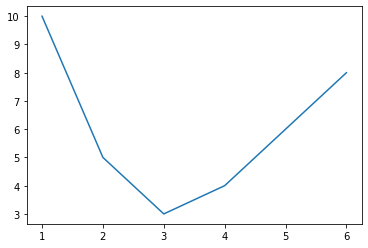

In [ ]:
a = [1, 2, 3, 4, 5 ,6]
b = [10, 5, 3, 4, 6, 8]
plt.plot(a, b)
plt.show()

Para não haver necessidade de rodar o comando **plt.show()** em todas as plotagens de gráficos utilizamos uma função mágica do matplotlib cujo objetivo é de que a saída dos comandos de plotagem é exibida em linha diretamente abaixo da célula de código que o produziu.

In [ ]:
%matplotlib inline

Vamos importar também outros pacotes padrões

In [ ]:
import pandas as pd
import numpy as np

## Scatter (dispersão)
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

[0.22821338 0.28886587 0.2509458  0.47295058 0.42333685 0.93018009
 0.04231314 0.17880863 0.72007727 0.01285356]
[0.93622323 0.1492296  0.70641613 0.38265602 0.8330579  0.9076441
 0.99457049 0.20681541 0.55405657 0.98695121]


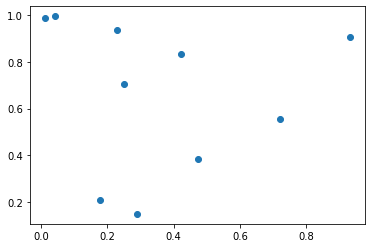

In [ ]:
x = np.random.rand(10)
y = np.random.rand(10)
print(x)
print(y)
#color = [1, 1, 2, 2, 2, 2, 3, 4, 1, 4]
plt.scatter(x=x, y=y);

Importando o dataset dos pinguins

In [ ]:
df_size = pd.read_csv('sample_data/penguins_size.csv')
df_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Para plotagem dos gráficos existem duas formas básicas:
1. Passar nos eixos X e Y tanto as colunas quanto o dataframe no formato df['coluna'] 
2. Passar apenas a string com nome das colunas para os parâmetros X e Y e o dataframe no parâmetro data

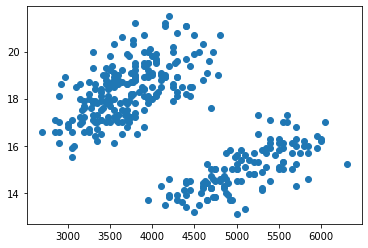

In [ ]:
plt.scatter(x=df_size['body_mass_g'], y=df_size['culmen_depth_mm']);

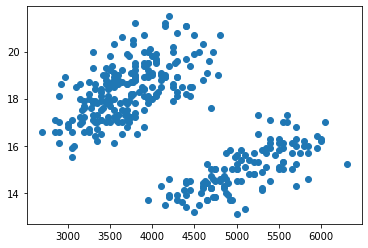

In [ ]:
plt.scatter(x='body_mass_g', y='culmen_depth_mm', data=df_size);

É possíve verificar a diferença entre as plotagens através do Pandas e Matplotlib por meio do código abaixo.

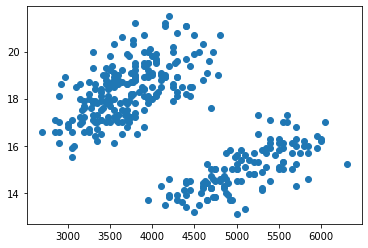

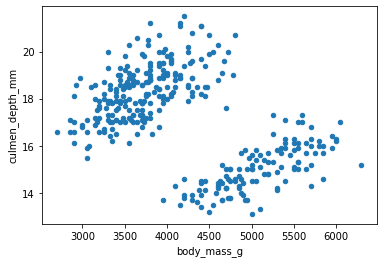

In [ ]:
#Matplotlib
plt.scatter(x=df_size['body_mass_g'], y=df_size['culmen_depth_mm'])
#Pandas
df_size.plot(x='body_mass_g', y='culmen_depth_mm', kind='scatter');

Nota-se que visualmente não há muita diferença, porém a sintaxe que gera os gráficos possui certas diferenças.

Podemos alterar as cores dos marcadores através de alguma variável do próprio dataframe como por exemplo o sexo dos pinguins.  
  
Por padrão o parâmetro *c* do scatter necessita de uma lista apenas com cores ou números. Como no nosso dataframe as categorias são MALE, FEMALE e NaN, apenas alteramos estes valores para 0, 1 e 2. 

In [ ]:
df_size['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [ ]:
df_size['sex'].isnull().sum()

10

Para simplificar iremos excluir os valores NaN

In [ ]:
df_tratado_sex = df_size.dropna(subset=['sex'])

In [ ]:
df_tratado = df_size.dropna()

In [ ]:
df_tratado_sex.shape

(334, 7)

In [ ]:
df_tratado.shape

(334, 7)

In [ ]:
df_tratado['sex'].isnull().sum()

0

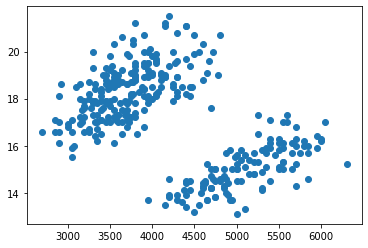

In [ ]:
plt.scatter(x=df_tratado['body_mass_g'], y=df_tratado['culmen_depth_mm']);

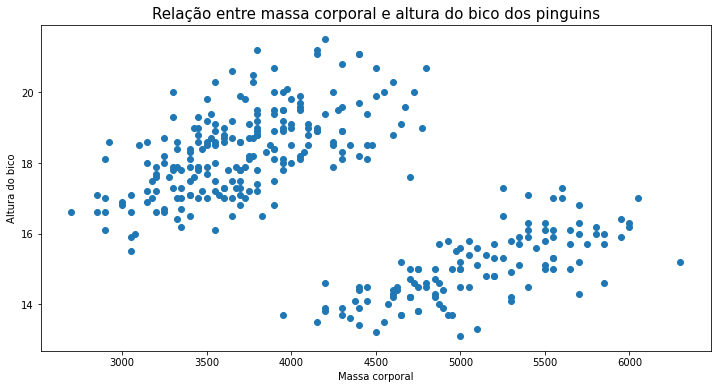

In [ ]:
plt.figure(figsize=(12,6))

ax = plt.scatter(x=df_tratado['body_mass_g'], y=df_tratado['culmen_depth_mm'])

plt.xlabel('Massa corporal')
plt.ylabel('Altura do bico')
plt.title('Relação entre massa corporal e altura do bico dos pinguins', fontsize=15);

## Linhas
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

In [ ]:
df_vendas = pd.DataFrame({'Mês' : ['Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr'],
                         'Quantidade' : np.random.randint(low=100, size=12),
                          'Veículo' : np.repeat(['HB20', 'Onix', 'Sandero'],4)})
df_vendas.head()

,Mês,Quantidade,Veículo
0,Jan,68,HB20
1,Fev,48,HB20
2,Mar,7,HB20
3,Abr,29,HB20
4,Jan,61,Onix


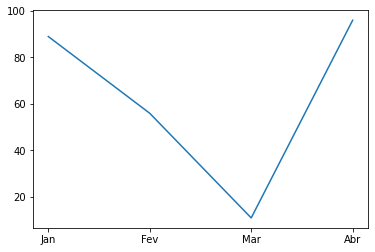

In [ ]:
filtro1 = df_vendas['Veículo']=='HB20'
filtro2 = df_vendas['Veículo']=='HB20'

plt.plot(df_vendas[filtro1]['Mês'], df_vendas[filtro2]['Quantidade']);

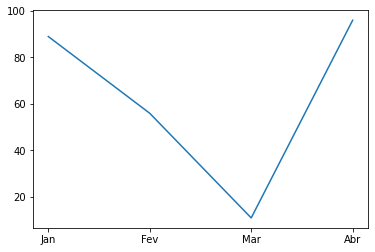

In [ ]:
plt.plot('Mês', 'Quantidade', data=df_vendas[filtro1]);

### Estrutura  
No matplotlib, temos dois conceitos importantes:  
  
* Área de plotagem (eixos ou Axes)
    área onde os gráficos (linhas, barras, pontos, labels, ticks, etc) aparecem. Cada Axes possui um eixo-x e eixo-y.
* Figure
    é o container de nível superior que mantém toda a estrutura. É a janela onde tudo é desenhado e controlado. Dentro dele podemos ter vários gráficos independentes.
  
  
Antes de gerarmos múltiplos gráficos, precisamos decidir:

* podemos imprimir dois gráficos, ex: duas linhas, na mesma área de plotagem
* ou em áreas de plotagens diferentes.

**No mesmo Eixo**

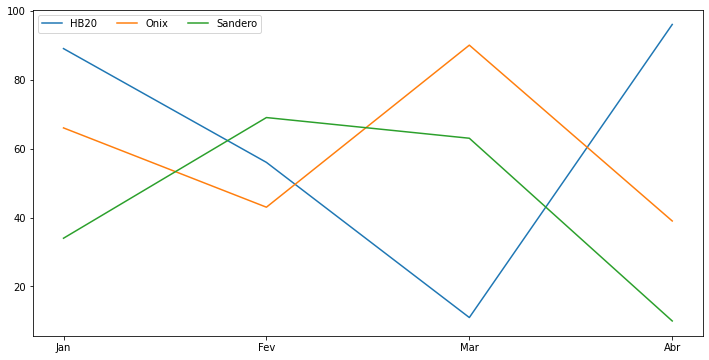

In [ ]:
plt.figure(figsize=(12,6))
plt.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='HB20'], label='HB20')
plt.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Onix'], label='Onix')
plt.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Sandero'], label='Sandero')

plt.legend(ncol=3);

**Em vários eixos**  
Para plotar os gráficos em vários eixos utilizaresmos o método *plt.subplots*, cuja função é gerar uma figura e um conjunto de eixos pré-posicionados num formato de grade.  
  
Para isso, ao chamarmos essa função, iremos passar dois argumentos:
* nrows: indica quantas linhas. 
* ncols: indinca quantas colunas.
  
No exemplo abaixo teremos 4 gráficos sendo, portanto, 2 linhas e 2 colunas. Desta forma, retornará uma tupla de dois elementos:  
  
* um objeto do tipo Figure que representa a figura  
* lista ou matriz de eixos  
  
Podemos acessar cada eixo usando a notação de colchetes, e invocar a função de plot normalmente.

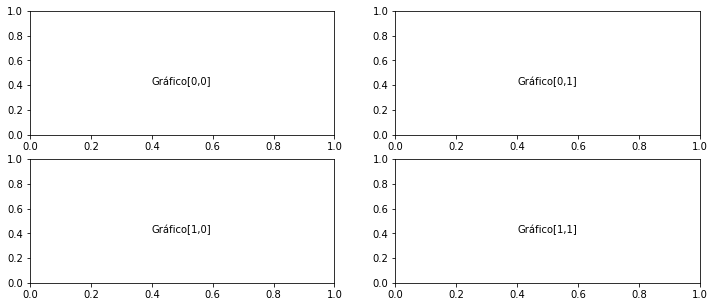

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,5))

axs[0,0].text(0.4, 0.4, 'Gráfico[0,0]')
axs[0,1].text(0.4, 0.4, 'Gráfico[0,1]')
axs[1,0].text(0.4, 0.4, 'Gráfico[1,0]')
axs[1,1].text(0.4, 0.4, 'Gráfico[1,1]');

No exemplo de vendas temos 3 gráficos, por isso é possível fazer os subplots com 3 linhas e 1 coluna ou 1 linha e 3 colunas. Aqui, seguiremos com o segundo casO (1 linha e 3 colunas).  

Repare que ao passar nrows=1, espertamente, o matplotlib não devolve uma matriz e sim uma lista.  

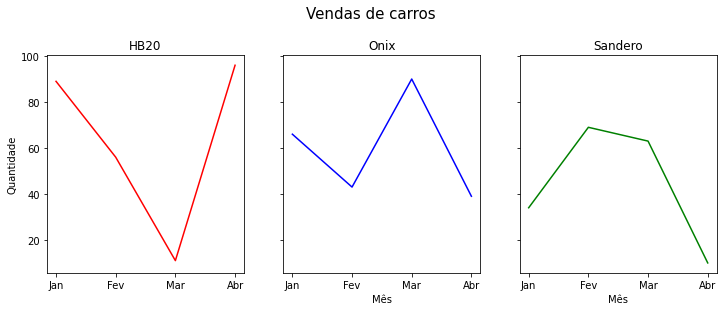

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)

fig.suptitle('Vendas de carros', fontsize=15, y=1.05)
axs[0].plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='HB20'], c='red', label = 'HB20')
axs[1].plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Onix'], c='blue', label = 'Onix')
axs[2].plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Sandero'], c='green', label = 'Sandero')


axs[0].set(ylabel='Quantidade', title='HB20')
axs[1].set(xlabel='Mês', title='Onix')
axs[2].set(title='Sandero');

Para diferenciarmos os gráficos podemos utilizar os parâmetros linewidth, linestyle e color. Estes parâmetros podem ser utilizados por meio de abreviações de linewidth = lw, linestyle = ls e color = c.

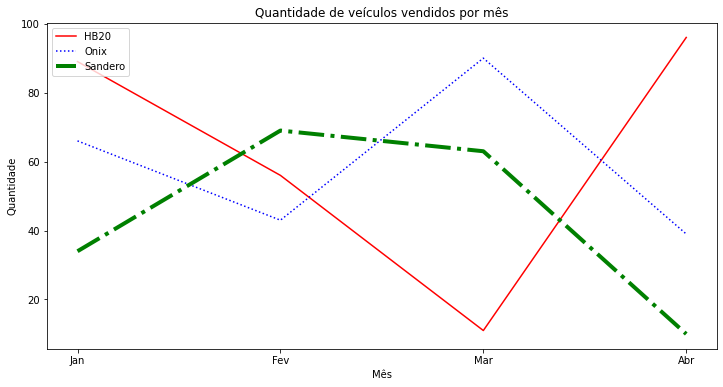

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='HB20'], c='red', ls='-', label='HB20')
ax.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Onix'], c='blue', ls=':', label='Onix')
ax.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Sandero'], c='green', ls='-.', label='Sandero', lw=4);

ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de veículos vendidos por mês')

ax.legend(loc='upper left');

Para utilizar cores hexadecimal é possível consultar alguns códigos no link https://celke.com.br/artigo/tabela-de-cores-html-nome-hexadecimal-rgb

## Pizza
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

In [ ]:
df_veiculo = df_vendas.pivot_table(index='Veículo', values='Quantidade', aggfunc='sum')
df_veiculo.head()

,Quantidade
Veículo,
HB20,252
Onix,238
Sandero,176


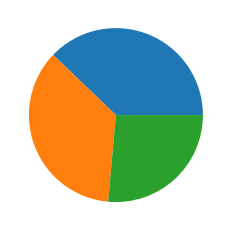

In [ ]:
plt.pie('Quantidade', data=df_veiculo);

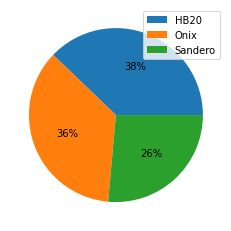

In [ ]:
plt.pie('Quantidade', data=df_veiculo, autopct='%1.0f%%')
plt.legend(labels=['HB20', 'Onix', 'Sandero']);

In [ ]:
df_vendas['Mês']

0     Jan
1     Fev
2     Mar
3     Abr
4     Jan
5     Fev
6     Mar
7     Abr
8     Jan
9     Fev
10    Mar
11    Abr
Name: Mês, dtype: object

In [ ]:
df_mes = df_vendas.pivot_table(index='Mês', values='Quantidade', aggfunc='sum')
df_mes

,Quantidade
Mês,
Abr,112
Fev,209
Jan,155
Mar,124


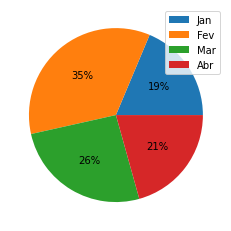

In [ ]:
plt.pie('Quantidade', data=df_mes, autopct='%1.0f%%')
plt.legend(labels=['Jan', 'Fev', 'Mar', 'Abr']);

In [ ]:
df_vendas['Mês'] = pd.Categorical(df_vendas['Mês'], categories=["Jan", "Fev", "Mar", "Abr"], ordered=True)
df_vendas['Mês']

0     Jan
1     Fev
2     Mar
3     Abr
4     Jan
5     Fev
6     Mar
7     Abr
8     Jan
9     Fev
10    Mar
11    Abr
Name: Mês, dtype: category
Categories (4, object): ['Jan' < 'Fev' < 'Mar' < 'Abr']

In [ ]:
df_vendas['Mês'] = pd.Categorical(df_vendas['Mês'], categories=["Jan", "Fev", "Mar", "Abr"], ordered=True)
df_mes = df_vendas.pivot_table(index='Mês', values='Quantidade', aggfunc='sum')
df_mes.head()

,Quantidade
Mês,
Jan,155
Fev,209
Mar,124
Abr,112


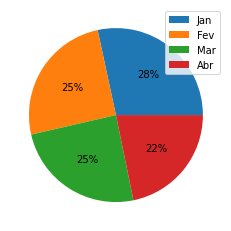

In [ ]:
plt.pie('Quantidade', data=df_mes, autopct='%1.0f%%')
plt.legend(labels=['Jan', 'Fev', 'Mar', 'Abr']);

## Barras
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

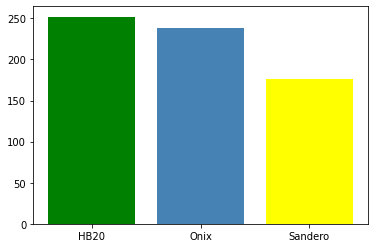

In [ ]:
plt.bar(df_veiculo.index, df_veiculo['Quantidade'], color=['green', '#4682B4', 'yellow']);

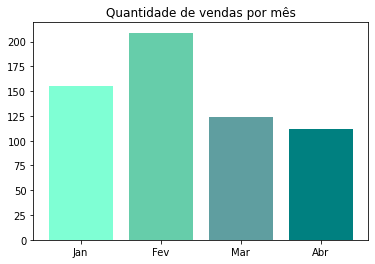

In [ ]:
ax = plt.bar(df_mes.index, df_mes['Quantidade'], color=['#7FFFD4', '#66CDAA', '#5F9EA0', '#008080'])
plt.title('Quantidade de vendas por mês');

**Barras Horizontais**

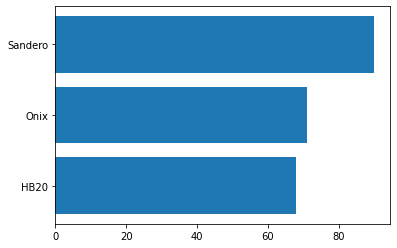

In [ ]:
plt.barh(df_vendas['Veículo'], df_vendas['Quantidade']);

## Histograma
**Documentação**: https://matplotlib.org/stable/gallery/statistics/hist.html

In [1]:
plt.hist(x=df_size['body_mass_g'], alpha=0.5, color='green');

NameError: ignored

In [ ]:
plt.hist(df_size['body_mass_g'], alpha=0.4, color='green', edgecolor='black')
plt.xlabel('Massa dos Pinguins', fontsize=12);

## Boxplot
**Documentação**: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

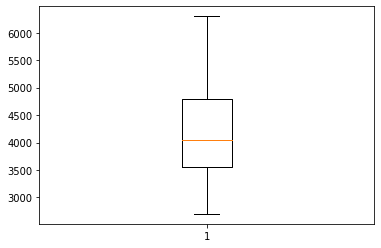

In [ ]:
plt.boxplot(df_tratado['body_mass_g']);

## Exercício
Agora é hora de praticar!  
  
Os bancos obtêm uma receita importante com empréstimos concedidos. Mas muitas vezes está associado ao risco. O mutuário pode não pagar o empréstimo. Para mitigar esse problema, os bancos decidiram usar o Machine Learning para superar esse problema. Eles coletaram dados anteriores sobre os tomadores de empréstimos e gostariam que você desenvolvesse um modelo de ML forte para classificar se algum novo devedor provavelmente entrará em default ou não.  
  
O conjunto de dados é enorme e consiste em vários fatores determinísticos, como renda do mutuário, gênero, finalidade do empréstimo, etc. O conjunto de dados está sujeito a uma forte multicolinearidade e valores vazios. Você pode superar esses fatores e construir um classificador forte para prever inadimplentes?

Importe a base **Loan_Default.csv** que está em csv dentro do diretório **data**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_loan = pd.read_csv('sample_data/Loan_Default.csv')
df_loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,construction_type,occupancy_type,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,sb,pr,1740.0,EXP,758,25-34,to_inst,98.728814,south,1
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,sb,pr,4980.0,EQUI,552,55-64,to_inst,NaN,North,1
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,9480.0,EXP,834,35-44,to_inst,80.019685,south,0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,sb,pr,11880.0,EXP,587,45-54,not_inst,69.376900,North,0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,10440.0,CRIF,602,25-34,not_inst,91.886544,North,0


In [ ]:
df_loan.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'income', 'credit_type',
       'Credit_Score', 'age', 'submission_of_application', 'LTV', 'Region',
       'Status'],
      dtype='object')

Verifique com a função .info os campos presentes na tabela

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_only              148670 non-null  object 
 13  lump_sum_payment           14

Imprima as estatísticas padrões do dataframe com a função .describe

In [ ]:
df_loan.describe()

,ID,year,loan_amount,rate_of_interest,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.0,1.486700e+05,112231.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,0.0,1.839093e+05,0.561391,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,24890.000000,2019.0,1.650000e+04,0.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


# BORA PRATICAR

1) Verifique sua variável de interesse (Status) como a contagem de distribuição

In [ ]:
df_status = df_loan['Status'].value_counts()
df_status


0    112031
1     36639
Name: Status, dtype: int64

In [ ]:
#0 não é aceito pelo gráfico
df_status.rename(index={0:'bons pagadores',1:'maus pagadores'}, inplace=True)
df_status

bons pagadores    112031
maus pagadores     36639
Name: Status, dtype: int64

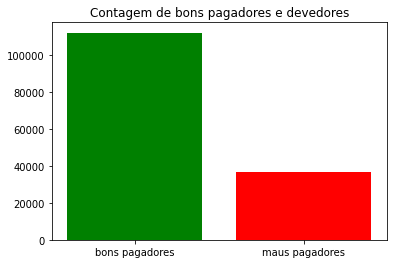

In [ ]:
plt.bar(df_status.index,df_status,color=['green','red'])
plt.title('Contagem de bons pagadores e devedores');

2) Por meio de um gráfico de dispersão, identifique o comportamento da média da variável de interesse (Status) por faixa etária

In [ ]:
df_status_idade = df_loan.pivot_table(index='age',values='Status',aggfunc='mean')
df_status_idade

,Status
age,
25-34,0.221920
35-44,0.222713
45-54,0.240467
55-64,0.258868
65-74,0.268560
<25,0.289454
>74,0.300070


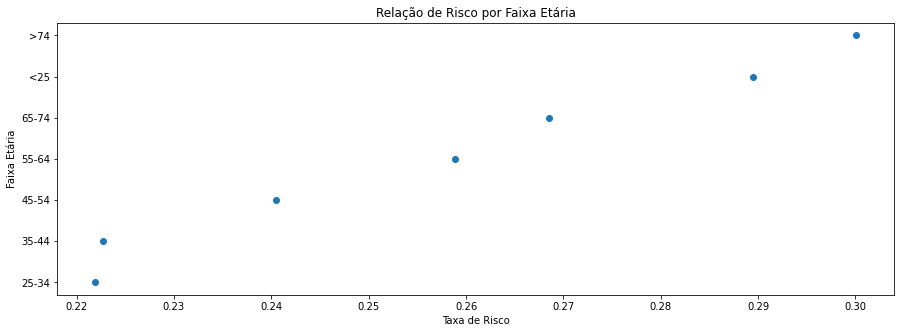

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(x=df_status_idade,y=df_status_idade.index)

plt.xlabel('Taxa de Risco')
plt.ylabel('Faixa Etária')
plt.title('Relação de Risco por Faixa Etária');

In [ ]:
#forçando que os intervalos sigam essa ordem
df_loan['age'] = pd.Categorical(df_loan['age'],['<25', '25-34', '35-44', '45-54','55-64','65-74', '>74'],ordered=True)
df_status_idade2 = df_loan.pivot_table(index='age',values='Status',aggfunc='mean')
df_status_idade2

,Status
age,
<25,0.289454
25-34,0.221920
35-44,0.222713
45-54,0.240467
55-64,0.258868
65-74,0.268560
>74,0.300070


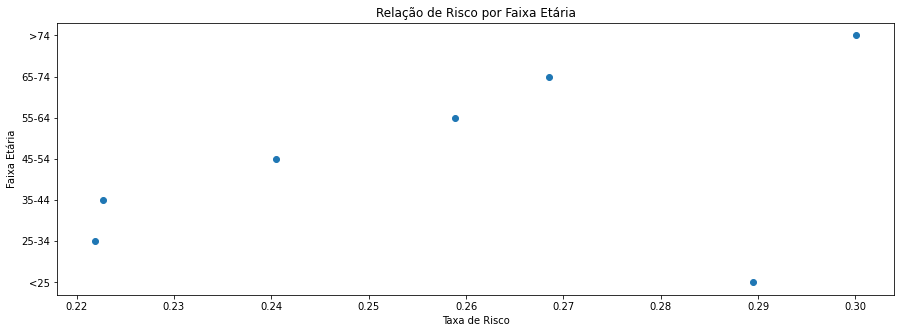

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(x=df_status_idade2,y=df_status_idade2.index)

plt.xlabel('Taxa de Risco')
plt.ylabel('Faixa Etária')
plt.title('Relação de Risco por Faixa Etária');

3) Construa o histograma do montante de dívida (loan_amount) e verifique como está sua distribuição. Observe o mesmo com um gráfico boxplot.

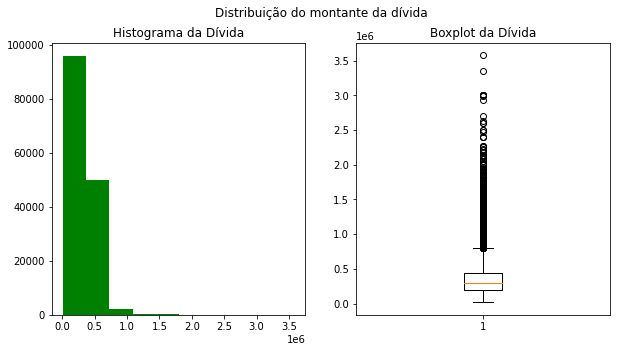

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

fig.suptitle('Distribuição do montante da dívida',fontsize=12)
axs[0].hist(x=df_loan['loan_amount'],color='green')
axs[0].set_title('Histograma da Dívida')
axs[1].boxplot(df_loan['loan_amount'])
axs[1].set_title('Boxplot da Dívida');

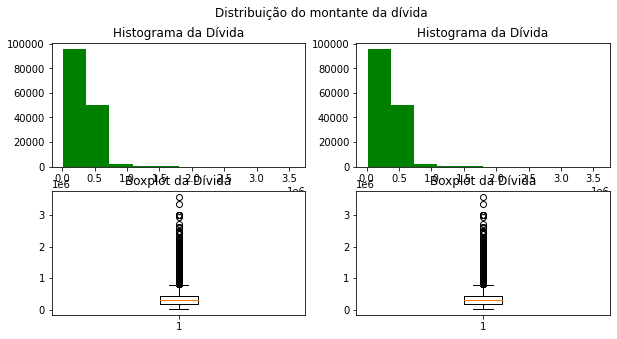

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,5))

fig.suptitle('Distribuição do montante da dívida',fontsize=12)
axs[0,0].hist(x=df_loan['loan_amount'],color='green')
axs[0,0].set_title('Histograma da Dívida')
axs[0,1].hist(x=df_loan['loan_amount'],color='green')
axs[0,1].set_title('Histograma da Dívida')
axs[1,0].boxplot(df_loan['loan_amount'])
axs[1,0].set_title('Boxplot da Dívida')
axs[1,1].boxplot(df_loan['loan_amount'])
axs[1,1].set_title('Boxplot da Dívida');

#Atividades

###Após a conclusão das atividades, coloque-a em um repositório Git público e envie o link por e-mail para: pablo.bizzi@gmail.com

*Obs: Pode ser utilizado um mesmo repositório GIT para todo o módulo.

1) Faça um gráfico de dispersão da Credit Score pela média do Status

2) Faça um gráfico de colunas que mostra a media de ganhos (coluna income) por faixa etária

3) Como se encontra a distribuição das faixas-etárias nesta base de dados.  
*Obs.: utilize o gráfico de pizza*